In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Circle, Polygon
from matplotlib.collections import PatchCollection

/Users/muneebalam/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/muneebalam/anaconda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/muneebalam/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def add_rink_boundaries(ax):
    # Center ice and bluelines
    for x, c in zip((-25, 0, 25), ('b', 'r', 'b')):
        ax.plot([x, x], [-42.5, 42.5], c=c)
    
    # Center circle
    p = Circle((0, 0), radius=15)
    p = PatchCollection([p])
    p.set_edgecolor('deepskyblue')
    p.set_facecolor('w')
    ax.add_collection(p)
    
    # Four corners
    rad_x = 13
    rad_y = 15
    center_x = 87
    center_y = 27.5
    xs = []
    ys = []
    for quadrant in range(4):
        xmult = 1
        ymult = 1
        if quadrant == 1 or quadrant == 2:
            xmult = -1
        if quadrant == 2 or quadrant == 3:
            ymult = -1
        
        start = quadrant * np.pi / 2
        end = start + np.pi / 2
        angles = np.linspace(start, end, num=20)
        
        # Add start
        xs.append(np.cos(start) * rad_x + center_x * xmult)
        ys.append(np.sin(start) * rad_y + center_y * ymult)
        
        for angle in angles:
            xs.append(np.cos(angle) * rad_x + center_x * xmult)
            ys.append(np.sin(angle) * rad_y + center_y * ymult)
        
        # Add end
        xs.append(np.cos(end) * rad_x + center_x * xmult)
        ys.append(np.sin(end) * rad_y + center_y * ymult)
    
    # Add in starting point again
    xs.append(np.cos(0) * rad_x + center_x)
    ys.append(np.sin(0) * rad_y + center_y)
        
    ax.plot(xs, ys, color='k')        
            
        
def foxy(reduced=False):
    for y in [-22, 22]:
        for x in [-69, 69]:
            yield x, y
        if not reduced:
            for x in [-20, 20]:
                yield x, y
            
            
def add_faceoff_dots(ax):
    patches = []
    for x, y in foxy(): 
        patches.append(Circle((x, y), radius=1))
    p = PatchCollection(patches)
    p.set_color('r')
    
    ax.add_collection(p)
    
    
def add_faceoff_dashes(ax):
    # Around the inner circle, four lines    
    for x, y in foxy(reduced=True):
        for dx1, dx2 in ((-2, -6), (2, 6)):
            for dy1, dy2 in ((-0.75, -0.75), (0.75, 0.75)):
                ax.plot([x-dx1, x-dx2], [y-dy1, y-dy2], color='r')
                
    for x, y in foxy(reduced=True):
        for dx1, dx2 in ((2, 2), (-2, -2)):
            for dy1, dy2 in ((0.75, 3.75), (-0.75, -3.75)):
                ax.plot([x-dx1, x-dx2], [y-dy1, y-dy2], color='r')
    
    # Around the outer circles, short lines
    for x, y in foxy(reduced=True):
        for dx1, dx2 in ((-6, -6), (6, 6)):
            for dy1, dy2 in ((-15, -17), (15, 17)):
                ax.plot([x-dx1, x-dx2], [y-dy1, y-dy2], color='r')
                
def add_faceoff_circles(ax):
    patches = []
    for x, y in foxy(reduced=True): 
        patches.append(Circle((x, y), radius=15))
    p = PatchCollection(patches)
    p.set_edgecolor('r')
    p.set_facecolor('w')
    
    ax.add_collection(p)

def add_goal_lines(ax):
    xs = [89, 89, -89, -89]
    ys = [42.5 - 15 + np.sqrt(209), -1 * (42.5 - 15 + np.sqrt(209))]
    ax.plot(xs[:2], ys, color='r')
    ax.plot(xs[2:], ys, color='r')
    
def add_nets(ax):
    # Black background
    for mult in (-1, 1):
        ax.plot(np.array([90, 92, 92, 90]) * mult, [-3, -3, 3, 3], color='k')
        
    # Creases 
    patches = []
    yseq = np.linspace(-4, 4, num=100)
    for xmult in (-1, 1):
        x1 = (83 + yseq**2 / 16 * 1.5) * xmult
        xy = np.array(list(zip(x1, yseq)))
        xy = np.vstack([np.array([[89 * xmult, -4]]), xy, np.array([[89 * xmult, 4]])])
        patches.append(Polygon(xy))
    p = PatchCollection(patches)
    p.set_edgecolor('r')
    p.set_facecolor('deepskyblue')
    ax.add_collection(p)
    
        
def add_restricted_areas(ax):
    for xmult in (-1, 1):
        for ymult in (-1, 1):
            ax.plot([89 * xmult, 100 * xmult], [11 * ymult, 14 * ymult], color='r')

(-100.0, 100.0, -45.0, 45.0)

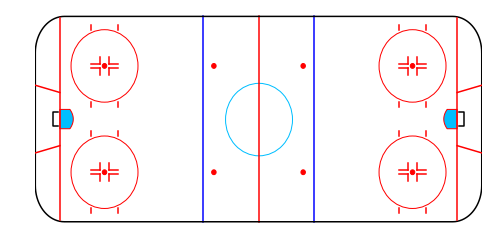

In [3]:
f = plt.figure(figsize=[8, 4])
ax = plt.gca()
add_rink_boundaries(ax)

add_faceoff_dashes(ax)
add_faceoff_circles(ax)
add_faceoff_dots(ax) # put this later to get zorder right

add_goal_lines(ax)
add_nets(ax)
add_restricted_areas(ax)

ax.set_xlim(-100, 100)
ax.set_ylim(-45, 45)
plt.axis('off')